<a href="https://colab.research.google.com/github/mccoy294/Quantum-Information-Science/blob/main/Bernstein_Vazirani_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Programming the Berstein-Vazirani Algorithm in Qiskit**

#Install Dependencies

In [ ]:
#Install qiskit in order to use the required packages

!pip install qiskit
!pip install pylatexenc
!pip install qiskit qiskit-aer


After the initial Qiskit package has been installed, import the remaining libraries for the rest of the computation. This includes:
- All Qiskit libraries
- Matplotlib inline
- The Plot_histogram function from the qiskit.tools.visualization package

In [48]:
#required libraries

from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

#Initial Setup

Set a secret number for future guessing

Afterwords, create a dynamic quantum circuit that has 2 inputs:

1. The number of qubits = the length of the secret number + 1 for the computation qubit
2. The number of classical bits for the storage of the results = the length of the secret number.

In [81]:
#Set the secret number in a string of binary numbers
secret_number = '1111001'

In [83]:
#Instantial a quantum circuit with the length of the secret number + 1 Qubits, and the length of the secret number classical bits
circuit = QuantumCircuit(len(secret_number)+1, len(secret_number))


In [84]:
#Transform all the Qubits into a superposition state using the Hadamard except the last Qubit
circuit.h(range(len(secret_number)))

#Add a not gate to the last qubit for CNOT comparrison later on and afterwards apply the Hadamard to continue the computation
circuit.x(len(secret_number))
circuit.h(len(secret_number))

#Add a barrier to break up the division of the computation visually
circuit.barrier()

"""


Iterate though the secret number and apply the number of CNOT gates to the associated Qubits to check for the number


"""
#Question to ask - doesn't this for operation have the same length of computation as the classical algorthim if it first has to check for the number of CNOT gates needed?
for ii, yesno in enumerate(reversed(secret_number)):
  if yesno =="1":
    circuit.cx(ii, len(secret_number))

#Add a barrier to break up the division of the computation visually
circuit.barrier()

#Transform all the Qubits into a superposition state using the Hadamard except the last Qubit
circuit.h(range(len(secret_number)))

#Add a barrier to break up the division of the computation visually
circuit.barrier()

#Apply a measurement to collapse the circuit into a final answer
circuit.measure(range(len(secret_number)),range(len(secret_number)))

#Draw the Circuit

In [85]:
#Draw the circuit

circuit.draw()

┌───┐      ░                           ░ ┌───┐ ░ ┌─┐                  
q_0: ┤ H ├──────░───■───────────────────────░─┤ H ├─░─┤M├──────────────────
     ├───┤      ░   │                       ░ ├───┤ ░ └╥┘┌─┐               
q_1: ┤ H ├──────░───┼───────────────────────░─┤ H ├─░──╫─┤M├───────────────
     ├───┤      ░   │                       ░ ├───┤ ░  ║ └╥┘┌─┐            
q_2: ┤ H ├──────░───┼───────────────────────░─┤ H ├─░──╫──╫─┤M├────────────
     ├───┤      ░   │                       ░ ├───┤ ░  ║  ║ └╥┘┌─┐         
q_3: ┤ H ├──────░───┼────■──────────────────░─┤ H ├─░──╫──╫──╫─┤M├─────────
     ├───┤      ░   │    │                  ░ ├───┤ ░  ║  ║  ║ └╥┘┌─┐      
q_4: ┤ H ├──────░───┼────┼────■─────────────░─┤ H ├─░──╫──╫──╫──╫─┤M├──────
     ├───┤      ░   │    │    │             ░ ├───┤ ░  ║  ║  ║  ║ └╥┘┌─┐   
q_5: ┤ H ├──────░───┼────┼────┼────■────────░─┤ H ├─░──╫──╫──╫──╫──╫─┤M├───
     ├───┤      ░   │    │    │    │        ░ ├───┤ ░  ║  ║  ║  ║  ║ └╥┘┌─┐
q_6: ┤ H ├──────░───┼────┼────┼────┼────■───░─┤ H ├─░──╫──╫──╫──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║  ║  ║  ║  ║  ║ └╥┘
q_7: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├─░───────░──╫──╫──╫──╫──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘└───┘└───┘ ░       ░  ║  ║  ║  ║  ║  ║  ║ 
c: 7/══════════════════════════════════════════════════╩══╩══╩══╩══╩══╩══╩═
                                                       0  1  2  3  4  5  6

#Run the simulation

Use the Qasm Simulator: Which stands for the Quantum Assembly Language

In [87]:
#Use the Qasm simulator as the backend to run the algorthim just developed
simulator = Aer.get_backend('qasm_simulator')

"""
Store the result of the computation by using the execute function.

This takes:
1) The Quantum circuit that was built
2) The simulator used to test the quantum circuit
3) The number of times you want to run the simulated circuit

"""
result = execute(circuit, backend = simulator, shots = 1).result()

#Get the counts of all the stored outcomes, since results may vary based on multiple shots on the true run, not simulated run
counts = result.get_counts()
print(counts)

{'1111001': 1}


#Visualize the results

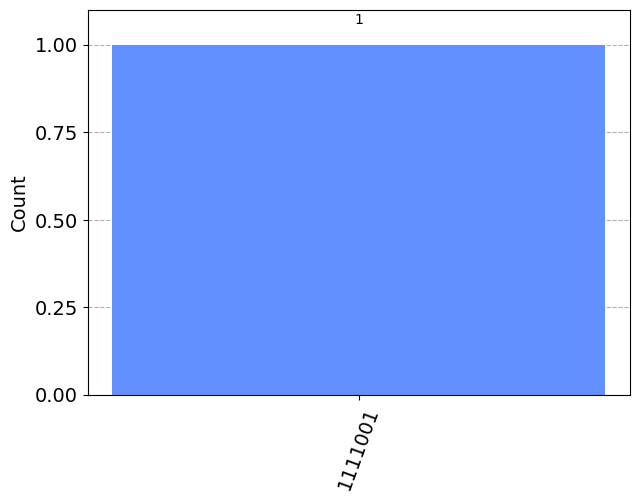

In [88]:
#Visualize the counts from the results. Plot them in a histogram to see the most likely outcome from the circuit

from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))